<h1><center>TEAM IGNITE</center></h1>

### Feature Selection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('student_success_dropout.csv')

In [3]:
df.sample()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1259,1,17,1,171,1,1,135.0,1,19,1,...,4,11,12,11,13.583333,0,8.9,1.4,3.51,2


In [4]:
import statsmodels.api as sm

X = df[['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']]
y = df['Target']

model = sm.OLS(y, sm.add_constant(X)).fit()

output = model.summary()

pvalues = model.pvalues

significant_features = [feature for feature, pvalue in pvalues.items() if pvalue < 0.005]

In [5]:
significant_features

['const',
 'Previous qualification',
 'Nacionality',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (approved)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)']

The features that we will be using to build our model will be-

'Previous qualification',
 'Nacionality',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (approved)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)'

### Model Building

In [6]:
X=df[[
 'Previous qualification',
 'Nacionality',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (approved)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)']]

In [7]:
y=df['Target']

#### Logistic Regression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [11]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
# Make predictions on the test data
y_pred = model.predict(x_test)

In [13]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8870523415977961


In [14]:
metrics.confusion_matrix(y_test, y_pred)

array([[246,  45],
       [ 37, 398]], dtype=int64)

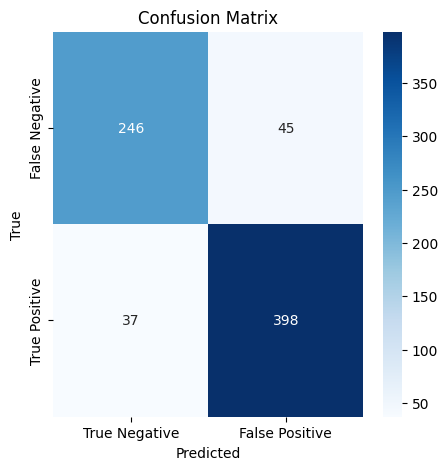

In [15]:
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=['True Negative','False Positive'], 
            yticklabels=['False Negative','True Positive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
xrf_train,xrf_test,yrf_train,yrf_test = train_test_split(X, y,test_size=0.2)

In [18]:
model_xrf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_xrf.fit(xrf_train,yrf_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [19]:
yrf_predict = model_xrf.predict(xrf_test)
model_score_r = model_xrf.score(xrf_test, yrf_test)

In [20]:
model_score_r

0.9008264462809917

In [21]:
print(metrics.classification_report(yrf_test, yrf_predict))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       275
           2       0.89      0.95      0.92       451

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



In [22]:
print(metrics.confusion_matrix(yrf_test, yrf_predict))

[[224  51]
 [ 21 430]]


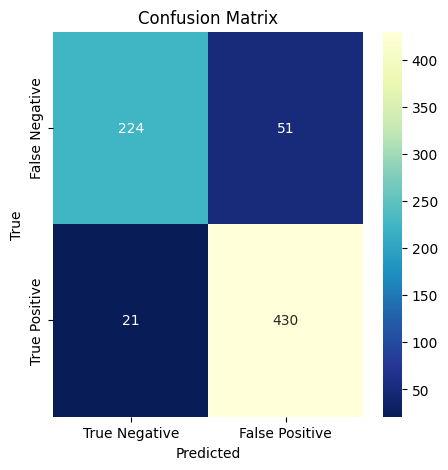

In [23]:
conf_mat = confusion_matrix(yrf_test, yrf_predict)

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu_r", fmt='d',
            xticklabels=['True Negative','False Positive'], 
            yticklabels=['False Negative','True Positive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
xgb_train,xgb_test,ygb_train,ygb_test = train_test_split(X, y,test_size=0.2)

In [34]:
# Define Gradient Boosting Classifier with hyperparameters
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC
gbc.fit(xgb_train,ygb_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [27]:
# Accuracy of model

print("Gradient Boost accuracy is %2.2f" % accuracy_score( 
     ygb_test, gbc.predict(xgb_test)))

Gradient Boost accuracy is 0.89


In [28]:
pred=gbc.predict(xgb_test)
print(classification_report(ygb_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       283
           2       0.87      0.96      0.91       443

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



In [29]:
print(confusion_matrix(ygb_test, gbc.predict(xgb_test)))

[[220  63]
 [ 17 426]]


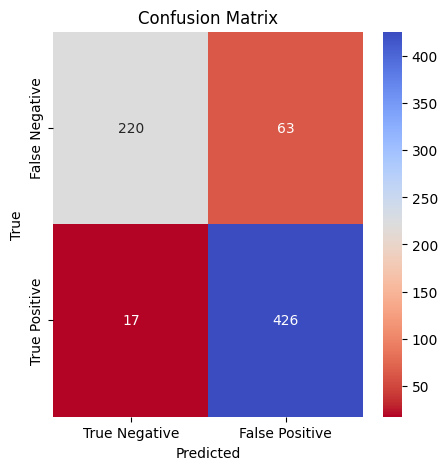

In [30]:
conf_mat = confusion_matrix(ygb_test, gbc.predict(xgb_test))

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm_r", fmt='d',
            xticklabels=['True Negative','False Positive'], 
            yticklabels=['False Negative','True Positive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Hyperparameter tuning using GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create a gradient boosting classifier
model_xrf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model_xrf, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the training data
grid_search.fit(xrf_train, yrf_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_model.score(xrf_test, yrf_test)
print("Best Parameters:", best_params)
print("Best Model Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Best Model Accuracy: 0.9049586776859504


### Model Deployment

In [31]:
# Load the new data into a pandas DataFrame
new_data = pd.read_csv(r"C:\Users\LENOVO\Dropbox\PC\Downloads\test sample.csv")

# Preprocess the new data (if required) to match the format of the training data

# Load the trained model
gbc = GradientBoostingClassifier()

# Assuming you have trained the model on X_train and y_train
# Fit the model on the training data
gbc.fit(xgb_train,ygb_train)

# Make predictions on the new data
predictions = gbc.predict(new_data)

# View the predicted labels
print(predictions)

[2 2 0 2 2 0 2 0 2 0 2 2 0 2 2 0 2 2 2]


0-Dropout

2-Graduated

##### Our model works pretty well on new data aswell.